# Lab 7: The Finite Difference Method

In [5]:
import numpy as np
from scipy.sparse import diags
from matplotlib import pyplot as plt

## Problem 1

Let $u(x) = sin((x+\pi)^2-1)$. Use (7.3)-(7.6) to approximate $\frac{1}{2}u''-u'$ at the grid points where $a=0$, $b=1$, and $n=10$. Graph the result.

In [1]:
a, b, n = 0, 1, 10
h = (b-a)/n
grid = np.linspace(a,b,n)
u = lambda x: np.sin((x+np.pi)**2 - 1)
x = lambda i: a + (i+1)*h

# Approximating the first derivative using (7.4)
ones_matrix = diags([-1,0,1],[-1,0,1],shape=(n-1,n-1)).todense()
straight_u = u(grid[:-1]) # don't include b
h_u = np.zeros(n-1)
h_u[0] = -1*u(x(-1))/(2*h)
h_u[-1] = u(x(n-1))/(2*h)
print("h_u:\n", h_u)
u_deriv = 1/(2*h)*(np.dot(ones_matrix,straight_u)) + h_u
print("Approx deriv:\n", u_deriv) # use this to test with the actual derivative below

# For testing, this is the actual derivative
v = lambda x: 2*(x+np.pi)*np.cos(1-(x+np.pi)**2)
print("actual deriv:\n",v(grid[:-1]))
# As of right now, they are pretty close ***UNTIL THE LAST ONE OF THE APPROX***
# ** NEED TO FIX SOMETHING**

# Aprroximating the second derivative using (7.6)
diag_matrix = diags([1,-2,1],[-1,0,1],shape=(n-1,n-1)).todense()
# the straight_u is the same as the first derivative
hh_u = np.zeros(n-1)
hh_u[0] = u(x(-1))/h**2
hh_u[-1] = u(x(n-1))/h**2
print("\nhh_u:\n",hh_u)
u_second_deriv = 1/h**2*(np.dot(diag_matrix,straight_u))+hh_u
print("Approx 2nd deriv:\n",u_second_deriv)

# For testing, this is the actual second derivative
w = lambda x: 4*(x+np.pi)**2*np.sin(1-(x+np.pi)**2)+2*np.cos(1-(x+np.pi)**2)
print("actual 2nd deriv:\n",w(grid[:-1]))
# Note that the approximated values are nearly as close in the second deriv
# as they were for the first deriv


approx = 1/2*u_second_deriv - u_deriv
plt.plot(grid[:-1],approx.T,label="My Approx")
plt.plot(grid[:-1],(1/2*u_second_deriv - u_deriv).T,label="Actual")
plt.legend()
plt.show()

NameError: name 'np' is not defined

## Problem 2

Use equation (7.9) to solve the singularly perturbed BVP (7.7) with $\epsilon=\frac{1}{10}$, $f(x)=-1$, $\alpha=1$, and $\beta=3$. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\epsilon$. For $\epsilon=0$ the ODE has a drastically different character--it then becomes first order, and can no longer support two bondary conditions.

That is $\epsilon$*x - u(x)' = f(x), x in (0,1), and u(0) = $\alpha$, u(1) = $\beta$

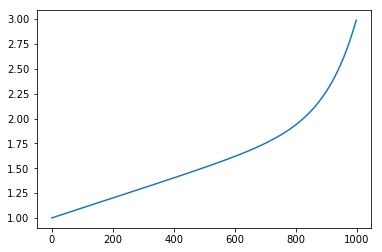

In [22]:
a = 0
b = 1
alpha = 1
beta = 3
fx = -1
e = .10
n = 1000
h = (b-a)/n

matrix = diags([e+h/2, -2*e, e-h/2],[-1,-0,1],shape = (n-1,n-1)).todense()
f_v = fx*np.ones(n-1)
f_v[0] = f_v[0] - alpha*(e+h/2)/h**2
f_v[-1] = f_v[-1] - beta*(e-h/2)/h**2

U = la.solve(1/h**2*matrix,f_v)
plt.plot(U)
plt.show()

## Problem 3

Return to Problem 2. How many subintervals are needed to obtain 4 digits of accuracy? 

This is a question about the convergence of your solution. the following code generates the log-log plot in Figure 7.2, and demonstrates second-order convergence for our finite difference approximation of (7.7). Use this code to determine what $h$ (and hence what $N$) is needed for the error to be less than $10^{-4}$. You don't need to return the value of $h$, but make sure you understand by looking at the plot.

Note: The function bvp is not provided; you need to use your code from Problem 2 to define it. Make sure your function is compatible with the code below. It must take 5 parameters as infput and return the solution. 

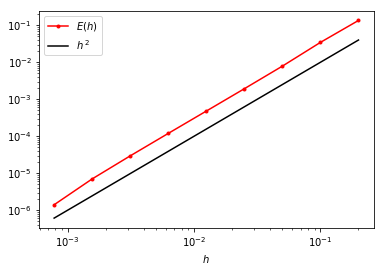

The order of the finite difference approximation is about  2.06975086632 .


In [47]:
f = lambda x: -1 + 0*x
#print (f(10))
def bvp(f,e = 0.1,alpha = 1,beta = 3,n = 100):
    a,b = 0,1
    h = (b-a)/n
    u = f(n)* np.ones(n-1)
    
    c =  diags([e+h/2, -2*e, e-h/2],[-1,-0,1],shape = (n-1,n-1)).todense()
    c*= (1/h**2)
    
    u[0] = u[0] - alpha*(e+h/2)/h**2
    u[-1] -= beta*(e - h/2)/h**2 
    U = la.solve(c,u)  
    return np.hstack((np.array([alpha]),U, np.array([beta])))


num_approx = 10 
# Number of Approximationsrfg
n = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)
# Best numerical solution, used to approximate the true solution. 
# bvp returns the grid, and the grid function, approximating the solution 
# with N subintervals of equal length. 
num_sol_best = bvp(lambda x:-1, e=.1, alpha=1, beta=3, n=n[-1]) 
for j in range(len(N)-1): 
    num_sol = bvp(lambda x:-1, e=.1, alpha=1, beta=3, n=n[j])
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)])) 
plt.loglog(h,max_error,'.-r',label="$E(h)$") 
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$") 
plt.xlabel("$h$") 
plt.legend(loc='best') 
plt.show() 
print("The order of the finite difference approximation is about ", 
          (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])), 
          ".")


## Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions (these boundary conditions are sometimes the Dirichlet conditions):
$$a_1(x)y''+a_2(x)y'+a_3(x)y=f(x), x\in(1,b),$$
$$y(a)=\alpha,\quad y(b)=\beta$$
Use your code to solve the boundary value problem
$$\epsilon y''-4(\pi-x^2)y=cosx,$$
$$y(0)=0,\quad y(\frac{\pi}{2})=1,$$
for $\epsilon=0.1$. Be sure to modify the finite difference operator $D_h$ in (7.8) correctly. 

## Problem 5

Numerically solve the boundary value problem
$$\epsilon y''+xy'=-\epsilon \pi^2cos(\pi x)-\pi xsin(\pi x)$$,
$$y(-1)=-2,\quad y(1)=0$$,
for $\epsilon =0.1,0.01, \quad\textrm{and}\quad 0.001$.

## Problem 6

Numerically solve the boundary value problem
$$(\epsilon+x^2)y''+4xy'+2y=0$$
$$y(-1)=1/(1+\epsilon),\quad y(1)=1/(1+\epsilon),$$
for $\epsilon = 0.05,0.02$.